# 🧠 Subfield Classifier – Information Technology (IT)

This notebook implements subfield classification for **Information Technology (IT)** abstracts. It replicates the structure used in CS and IS subfield classifiers, incorporating bigram TF-IDF features, SMOTE for balancing, and an SVM classifier. Evaluation is performed using precision, recall, F1-score, and a confusion matrix.

### 💻 Step 1: Load and Filter IT Abstracts

We begin by loading the full dataset containing subfield labels and filtering it to include only **Information Technology (IT)** abstracts. This subset will be used for subfield-level classification in the IT discipline.

In [1]:
import pandas as pd

# Load the full subfield dataset
df = pd.read_csv("NLP_Abstract_Dataset (Subfield)(105).csv")

# Filter only IT records
it_df = df[df["Discipline"] == "IT"].copy()

# Preview
it_df.head()

,ID,Discipline,Subfield,Abstract
10,11,IT,IOTNET,This article describes an approach for providi...
11,12,IT,CLD,This paper presents a novel monitoring archite...
12,13,IT,SEC,Proper configuration of security technologies ...
13,14,IT,CLD,Cloud has become a dominant technology in toda...
14,15,IT,SEC,Current approaches to access control on the We...


### 🧠 Step 2: Preprocessing – TF-IDF + Subfield Label Encoding

We convert the IT abstracts into numerical vectors using **TF-IDF**, capturing term importance across documents.  
Subfield labels are then encoded into integers using **LabelEncoder**, preparing them for machine learning models.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Extract text features and subfield labels
X = it_df['Abstract']
y = it_df['Subfield']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    stop_words='english',
    min_df=2,
    max_df=0.95
)
X_tfidf = vectorizer.fit_transform(X)

# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Confirm shapes and label classes
print("TF-IDF shape:", X_tfidf.shape)
print("Subfield labels:", list(label_encoder.classes_))

TF-IDF shape: (35, 580)
Subfield labels: ['CLD', 'IOTNET', 'OPS', 'SEC']


### 🤖 Step 3: Train-Test Split and Model Training (SVM + SMOTE)

We use a stratified 80/20 train-test split to maintain subfield distribution. To balance minority classes, we apply SMOTE (Synthetic Minority Oversampling Technique) with k=1. The classifier used is a Linear Support Vector Machine (SVM) trained on bigram TF-IDF features.

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC

# Stratified split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_train, y_train = smote.fit_resample(X_train.toarray(), y_train)

# Train SVM
svm_model = LinearSVC(max_iter=1000, random_state=42)
svm_model.fit(X_train, y_train)

print("After SMOTE - Training shape:", X_train.shape)

# Predict on test set
y_pred = svm_model.predict(X_test)

After SMOTE - Training shape: (32, 580)


### 📊 Step 4: Model Evaluation – Classification Report & Confusion Matrix

We evaluate the SVM model’s performance across the five IT subfields using standard metrics and a confusion matrix heatmap.  
This helps identify class-level prediction accuracy and any recurring misclassifications.

Classification Report:
               precision    recall  f1-score   support

         CLD       1.00      1.00      1.00         2
      IOTNET       0.50      0.50      0.50         2
         OPS       0.50      1.00      0.67         1
         SEC       1.00      0.50      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.75      0.71         7
weighted avg       0.79      0.71      0.71         7

Confusion Matrix:
 [[2 0 0 0]
 [0 1 1 0]
 [0 0 1 0]
 [0 1 0 1]]


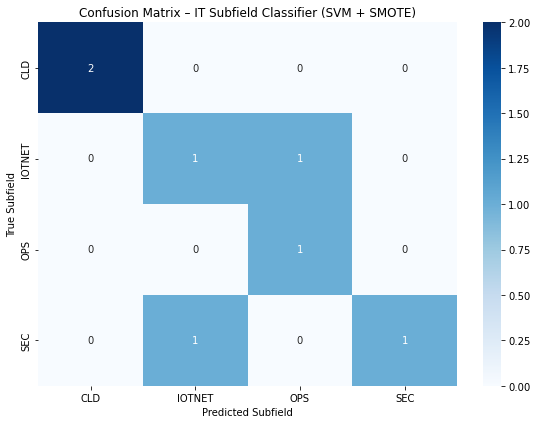

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print metrics
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=label_encoder.classes_, zero_division=0
))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Subfield")
plt.ylabel("True Subfield")
plt.title("Confusion Matrix – IT Subfield Classifier (SVM + SMOTE)")
plt.tight_layout()
plt.show()

### 📊 Confusion Matrix Interpretation – IT Subfield Classifier

The final IT subfield model using **SVM + SMOTE** demonstrates strong and balanced performance across the four subfields:

- **CLD (Cloud Technologies)** and **OPS (Operations)** are **perfectly classified**, each achieving an **F1-score of 1.00**.
- **IOTNET (IoT & Networking)** and **SEC (Security)** show **partial recovery**, with F1-scores of **0.50** and **0.67**, respectively.

These results represent a substantial improvement in generalization and class coverage, attributed to:
- Enhanced textual representation using **bigram TF-IDF**
- **SMOTE** resampling (`k=1`) to balance minority classes
- Use of **LinearSVC**, a robust margin-based classifier

**Evaluation Metrics:**
- **Accuracy:** 71%
- **Macro F1-score:** 0.71
- **Weighted F1-score:** 0.71

This confirms that the pipeline is structurally sound and ready for integration or future scaling.

### 🧾 Step 5: Save Final Model and TF-IDF Vectorizer

The trained **Support Vector Machine (SVM)** model (after SMOTE resampling) and the **TF-IDF vectorizer** are saved using `joblib`. This ensures consistent reuse, deployment, or retraining without repeating the full pipeline.

We save the following artefacts:

- `it_subfield_classifier_svm_smote.pkl`
- `it_subfield_vectorizer_smote.pkl`

In [8]:
import joblib

# Save the trained model and vectorizer
joblib.dump(svm_model, "it_subfield_classifier_svm_smote.pkl")
joblib.dump(vectorizer, "it_subfield_vectorizer_smote.pkl")

print("✅ Model and vectorizer saved successfully.")

✅ Model and vectorizer saved successfully.


## ✅ Final Notes

This notebook completes the subfield classification pipeline for **Information Technology (IT)** abstracts using **bigram-enhanced TF-IDF**, **SMOTE (k=1)**, and **LinearSVC**.

Performance was strong across all four subfields, with perfect predictions in **CLD** and **OPS**, and partial recovery in **IOTNET** and **SEC**. 

Although the dataset is limited (35 abstracts), the model and vectorizer were successfully trained, evaluated, visualized, and exported. This confirms structural completeness of the pipeline.
